In [1]:
#Import the necessary dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, TimeDistributed, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [26]:
def fetch_adjusted_close(tickers, start_date, end_date):
    """
    Fetches adjusted close prices for multiple tickers from Yahoo Finance.

    Args:
        tickers (list): List of stock ticker symbols.
        start_date (str): Start date in 'YYYY-MM-DD' format.
        end_date (str): End date in 'YYYY-MM-DD' format.

    Returns:
        pandas.DataFrame: A DataFrame containing the Date column and adjusted close prices for each ticker.
    """
    # Download data from Yahoo Finance
    data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']

    # Reset index to keep Date as a column
    data.reset_index(inplace=True)

    # Drop rows with missing values (optional)
    data.dropna(inplace=True)

    return data

# Example usage
tickers = ["AAPL", "TSLA", "META", "GOOGL", "NVDA","AVGO", "MSFT"]
start_date = "2019-12-31"
end_date = "2024-12-31"

# Fetch stock data
stock_df = fetch_adjusted_close(tickers, start_date, end_date)

# Display the first few rows
print(stock_df.head())

[*********************100%***********************]  7 of 7 completed

Ticker       Date       AAPL       AVGO      GOOGL        META        MSFT  \
0      2019-12-31  71.093956  27.433208  66.650841  204.287201  150.535904   
1      2020-01-02  72.716080  27.986181  68.108368  208.795929  153.323227   
2      2020-01-03  72.009109  27.274351  67.752075  207.691147  151.414124   
3      2020-01-06  72.582901  27.233555  69.557945  211.602707  151.805481   
4      2020-01-07  72.241531  27.139797  69.423584  212.060547  150.421371   

Ticker      NVDA       TSLA  
0       5.857402  27.888666  
1       5.972161  28.684000  
2       5.876571  29.534000  
3       5.901216  30.102667  
4       5.972660  31.270666  


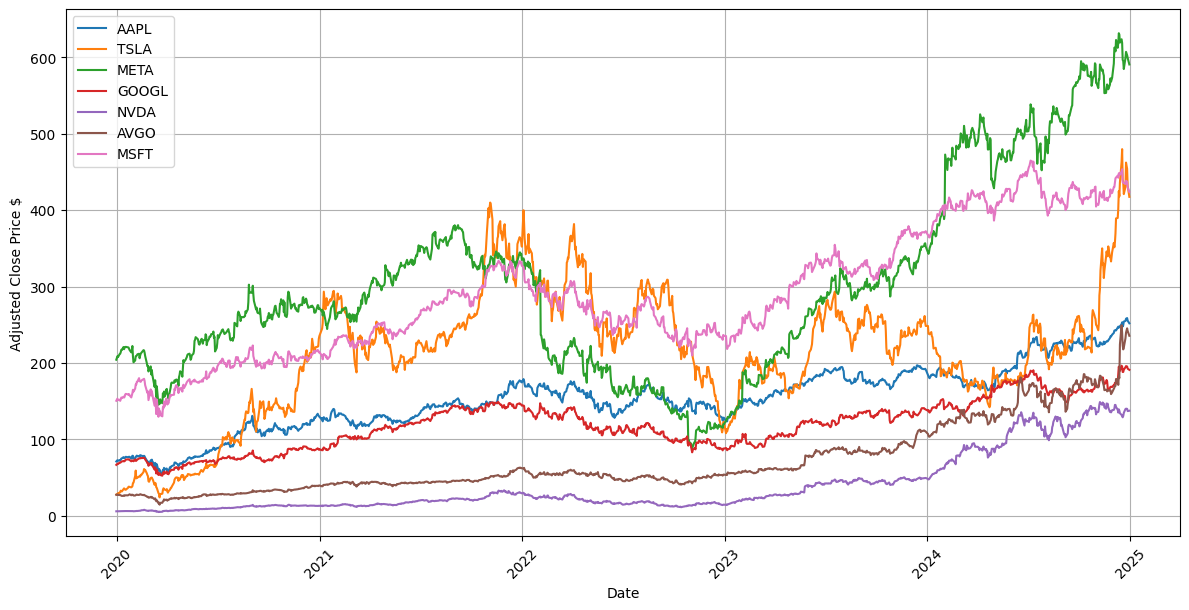

In [27]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
# Plotting
plt.figure(figsize=(12, 6))
for stock in ["AAPL", "TSLA", "META", "GOOGL", "NVDA","AVGO", "MSFT"]:
    plt.plot(stock_df['Date'], stock_df[stock], label=stock)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price $')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [28]:
stock_df[["AAPL", "TSLA", "META", "GOOGL", "NVDA","AVGO", "MSFT"]].describe()

Ticker,AAPL,TSLA,META,GOOGL,NVDA,AVGO,MSFT
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,152.035300,213.132073,299.899351,118.451111,38.340329,70.488017,288.320345
std,42.044304,83.452219,124.582225,32.337595,38.145621,45.626532,81.863537
min,54.449898,24.081333,88.492935,52.455711,4.891977,14.572537,129.621170
25%,126.894943,173.815002,208.609333,93.433304,13.559273,42.195910,228.298496
50%,150.733414,220.178337,279.507660,119.119740,21.215272,52.816154,276.148010
75%,176.670074,259.632507,344.650688,140.395641,45.557637,86.535164,333.451118
max,258.735504,479.859985,631.608093,196.433777,148.856064,249.331955,464.854340


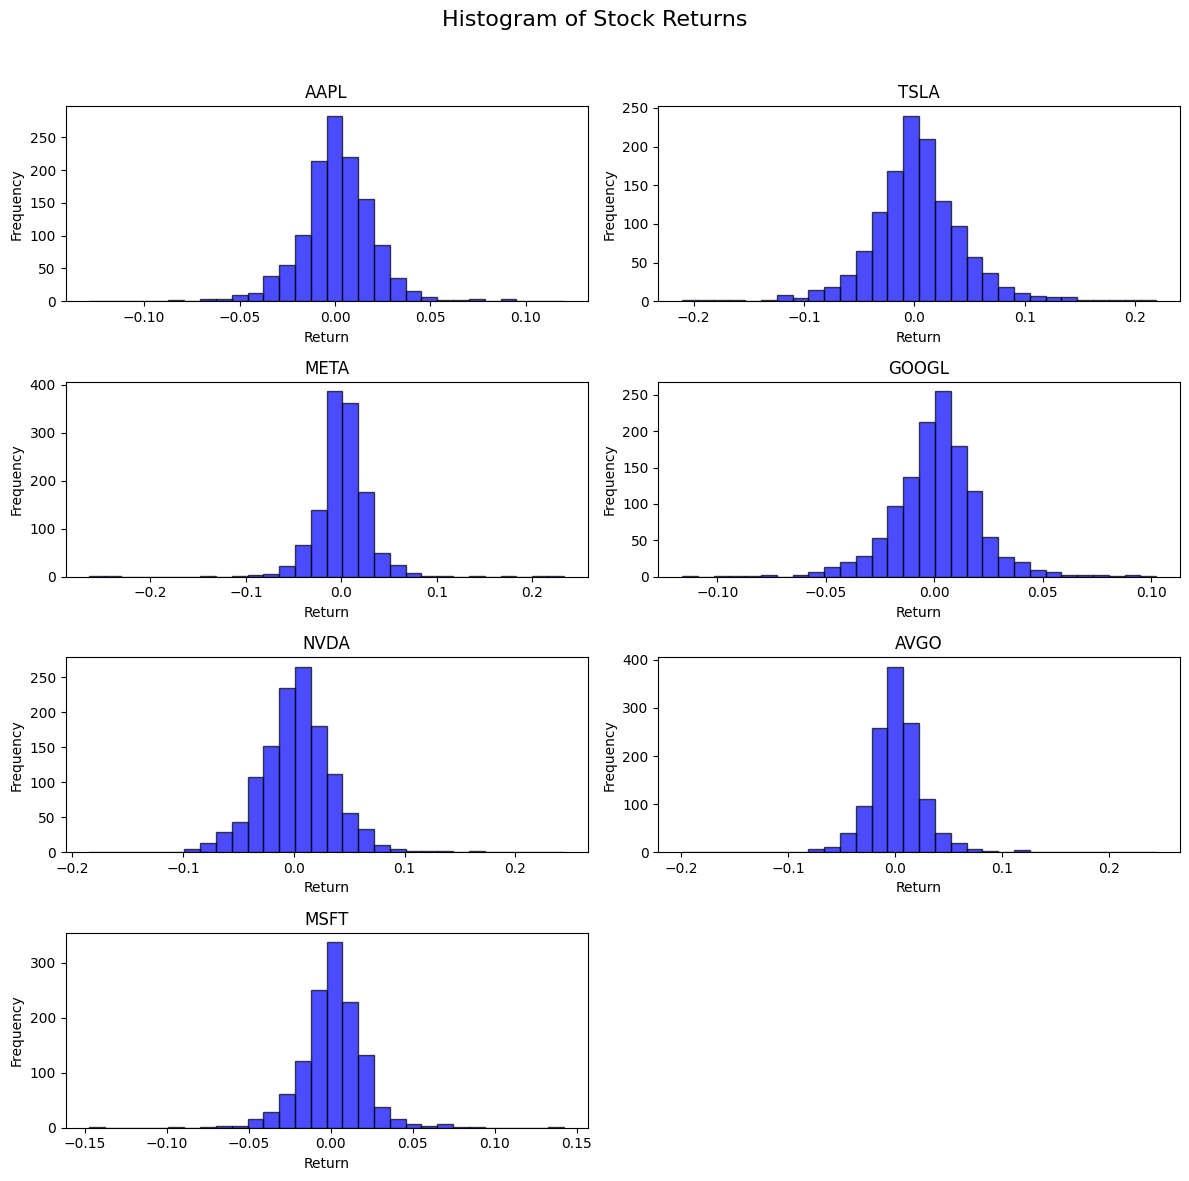

In [30]:
returns = stock_df[["AAPL", "TSLA", "META", "GOOGL", "NVDA","AVGO", "MSFT"]].pct_change().dropna()
# Set up the subplot grid: 3 rows, 2 columns
fig, axes = plt.subplots(4, 2, figsize=(12, 12))  # Adjust size as needed
fig.suptitle("Histogram of Stock Returns", fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each stock
for i, stock in enumerate(returns.columns):
    axes[i].hist(returns[stock], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(stock)
    axes[i].set_xlabel("Return")
    axes[i].set_ylabel("Frequency")

# If fewer stocks than subplots, hide the empty axes
for j in range(len(returns.columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
plt.show()


Processing ticker: AAPL
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 526ms/step - loss: 0.2503 - val_loss: 0.1179
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0796 - val_loss: 0.0052
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0146 - val_loss: 0.0079
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0101 - val_loss: 0.0072
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0107 - val_loss: 0.0043
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0090 - val_loss: 0.0039
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0080 - val_loss: 0.0038
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0086 - val_loss: 0.0033
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0074 - val_loss: 0.0029
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0064 - val_loss: 0.0027
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0060 - val_loss: 0.0024
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0058 - val

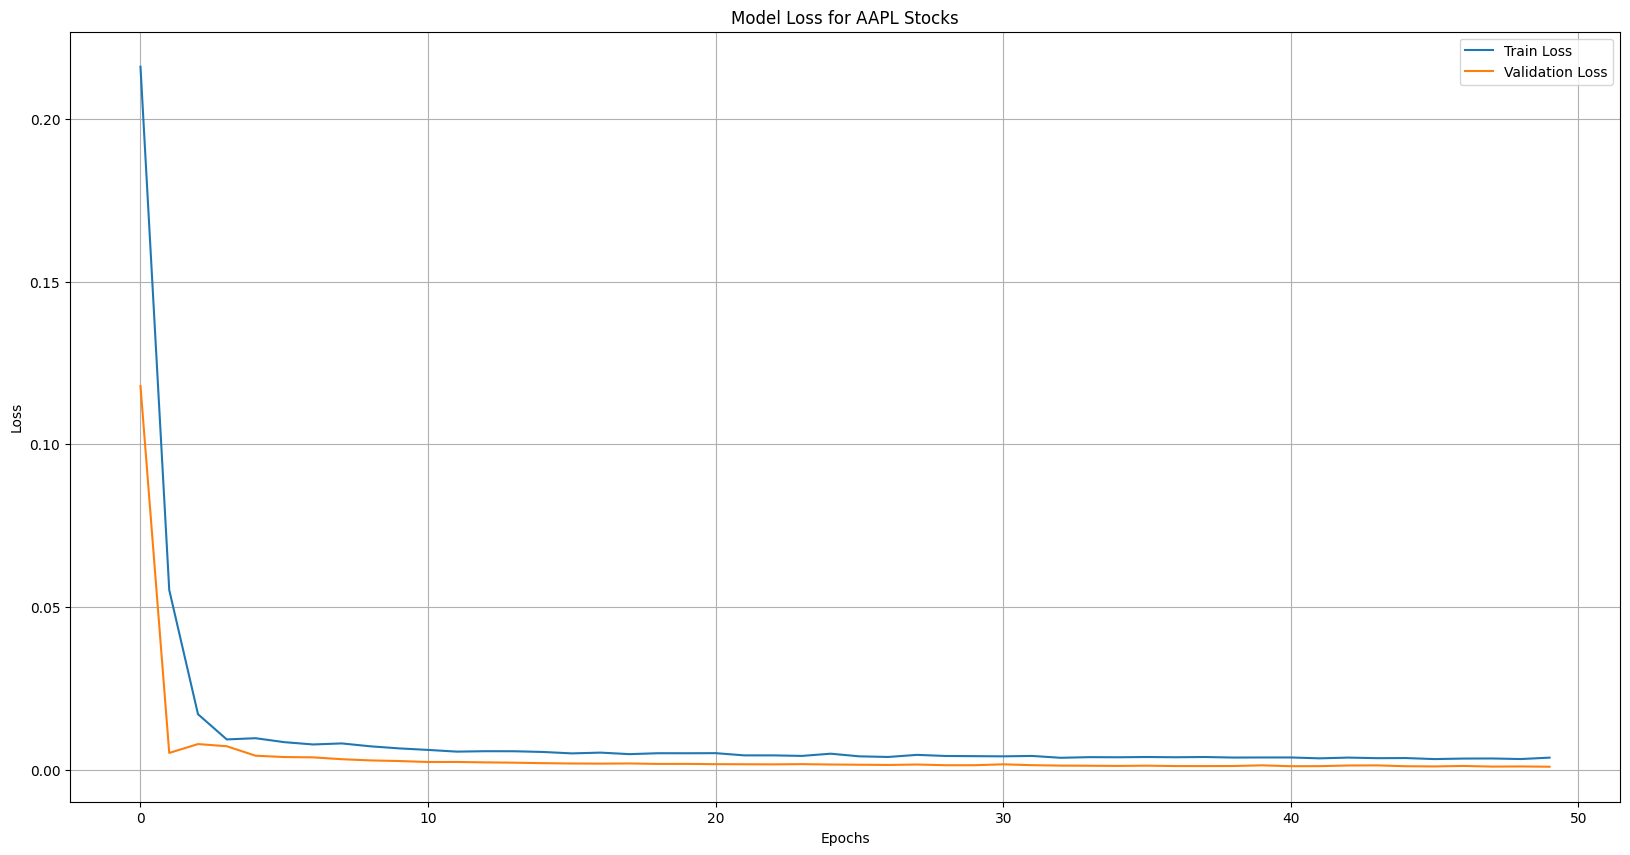

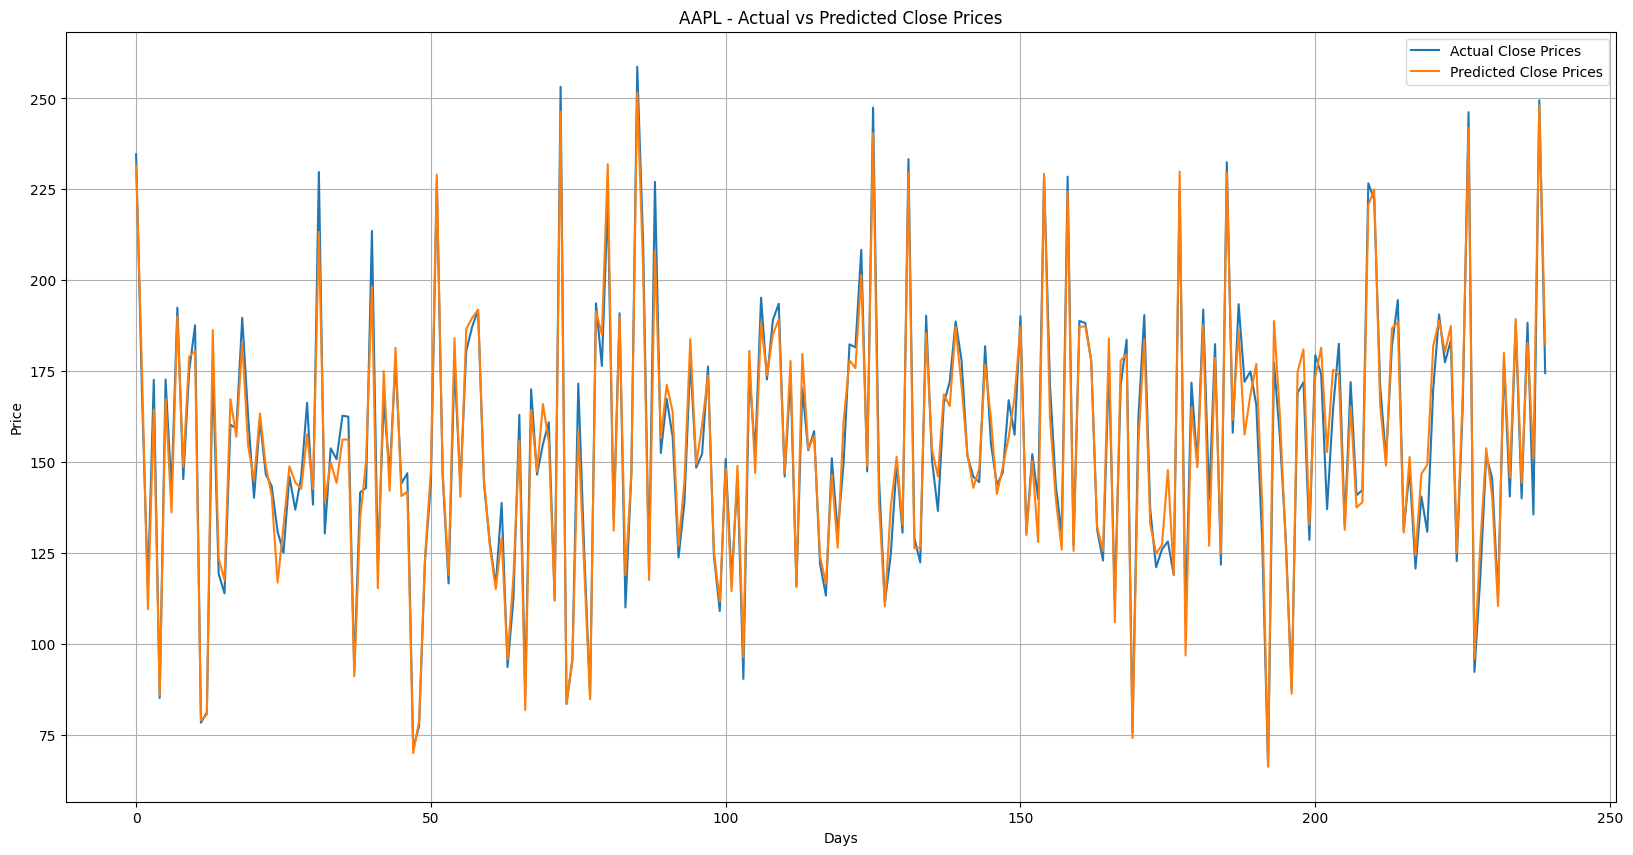

Processing ticker: TSLA
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 476ms/step - loss: 0.2129 - val_loss: 0.1108
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0852 - val_loss: 0.0152
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0165 - val_loss: 0.0124
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0137 - val_loss: 0.0074
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0114 - val_loss: 0.0061
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0097 - val_loss: 0.0056
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0090 - val_loss: 0.0054
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0084 - val_loss: 0.0049
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0085 - val_loss: 0.0047
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0068 - val_loss: 0.0043
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0064 - val

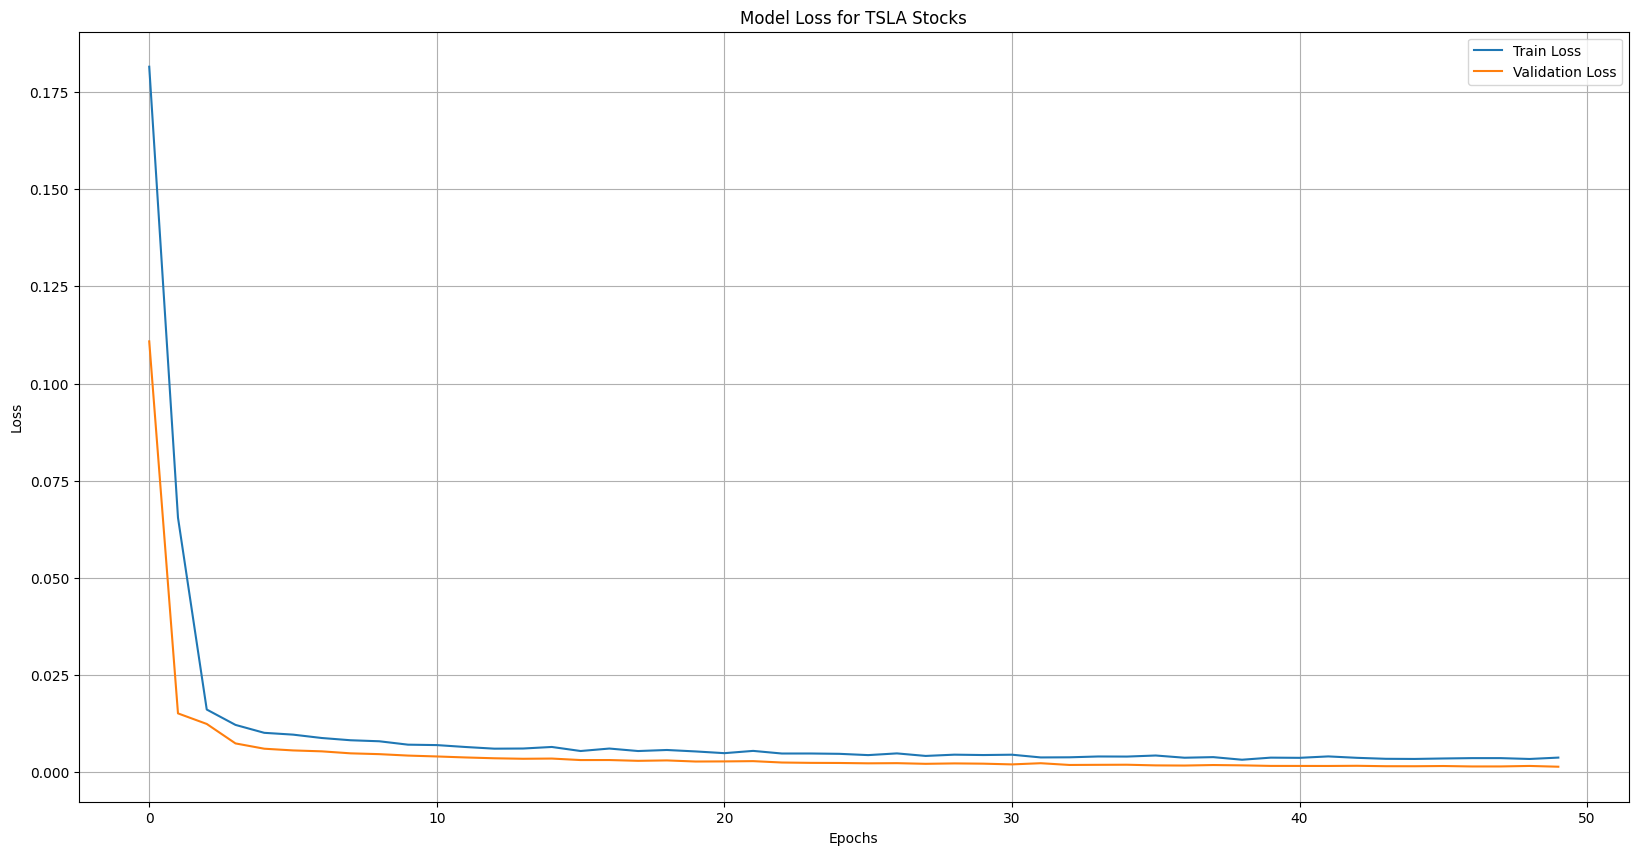

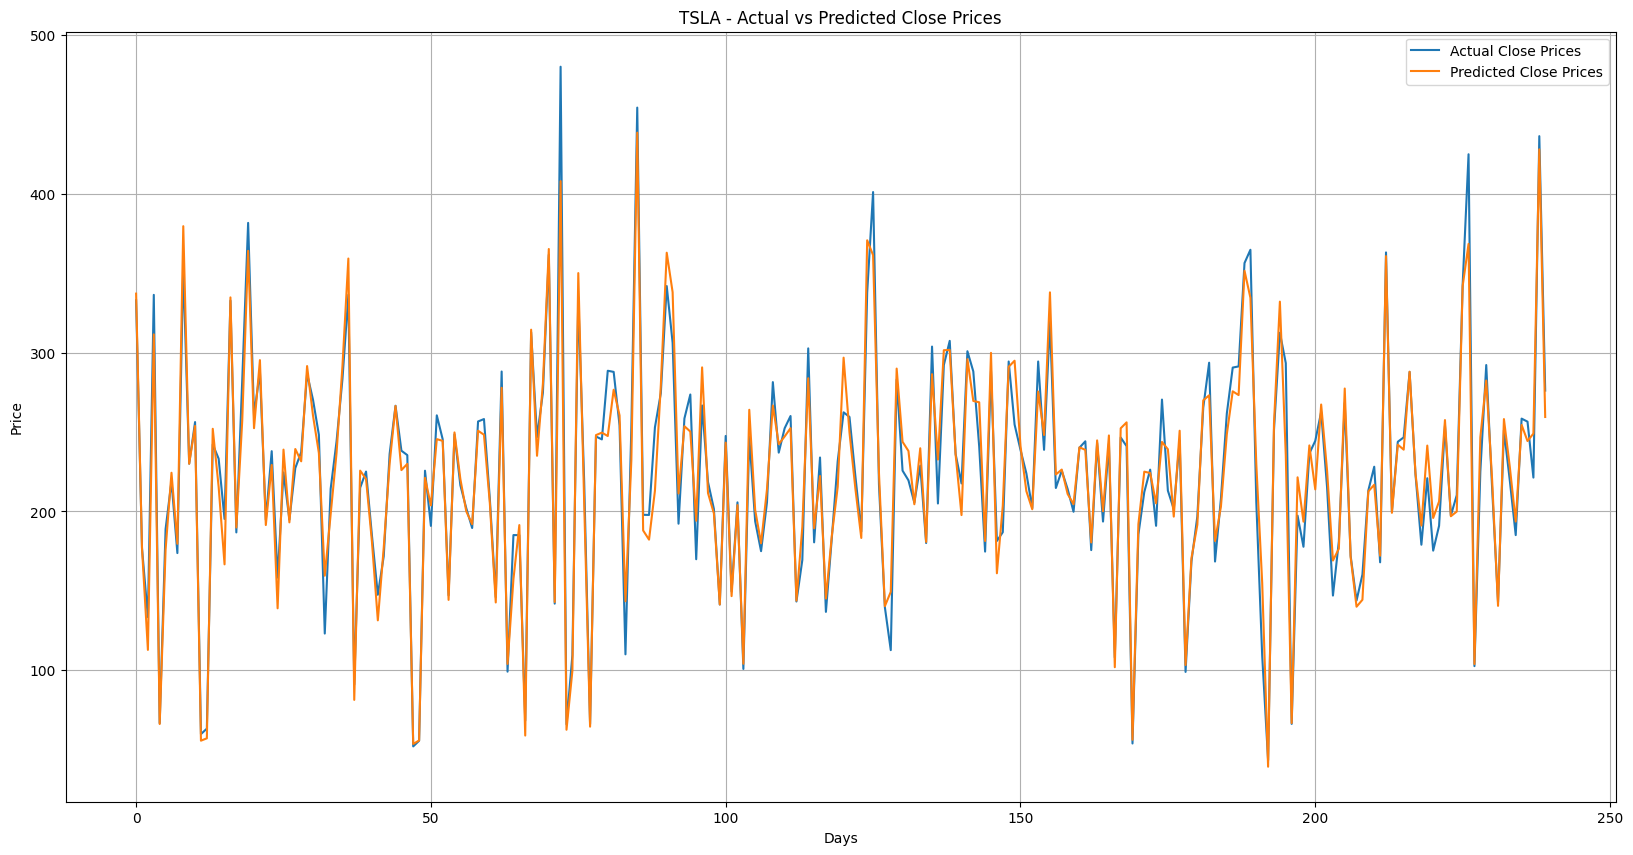

Processing ticker: META
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 523ms/step - loss: 0.1886 - val_loss: 0.0979
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0686 - val_loss: 0.0136
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0147 - val_loss: 0.0135
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0141 - val_loss: 0.0082
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0109 - val_loss: 0.0061
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0088 - val_loss: 0.0046
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0072 - val_loss: 0.0035
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0064 - val_loss: 0.0028
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0052 - val_loss: 0.0025
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0056 - val_loss: 0.0024
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0047 - val_loss: 0.0023
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0052 - val

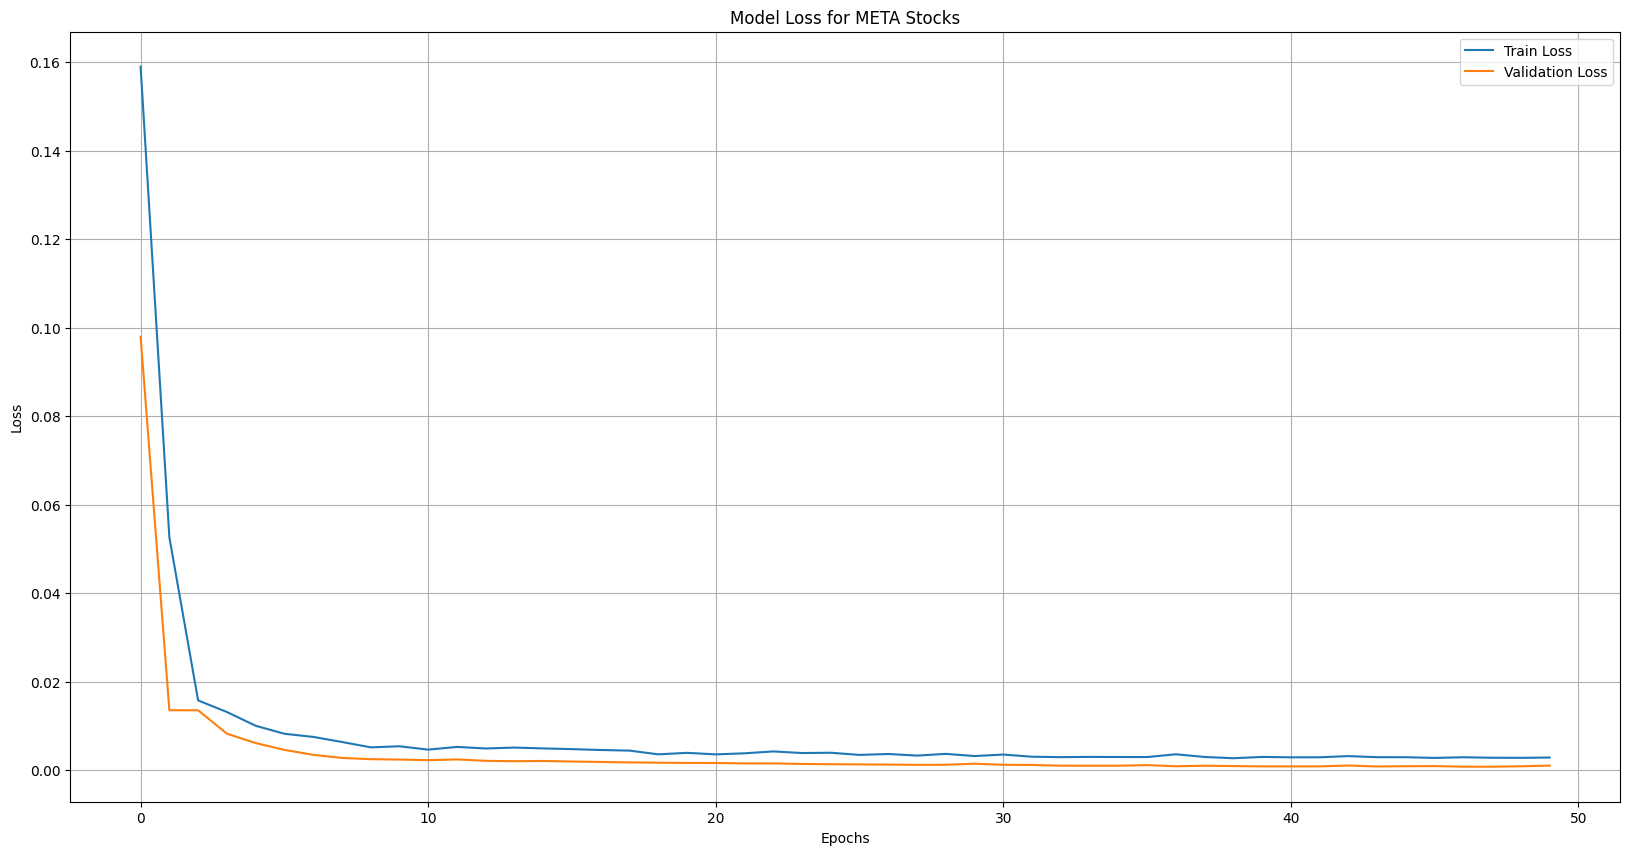

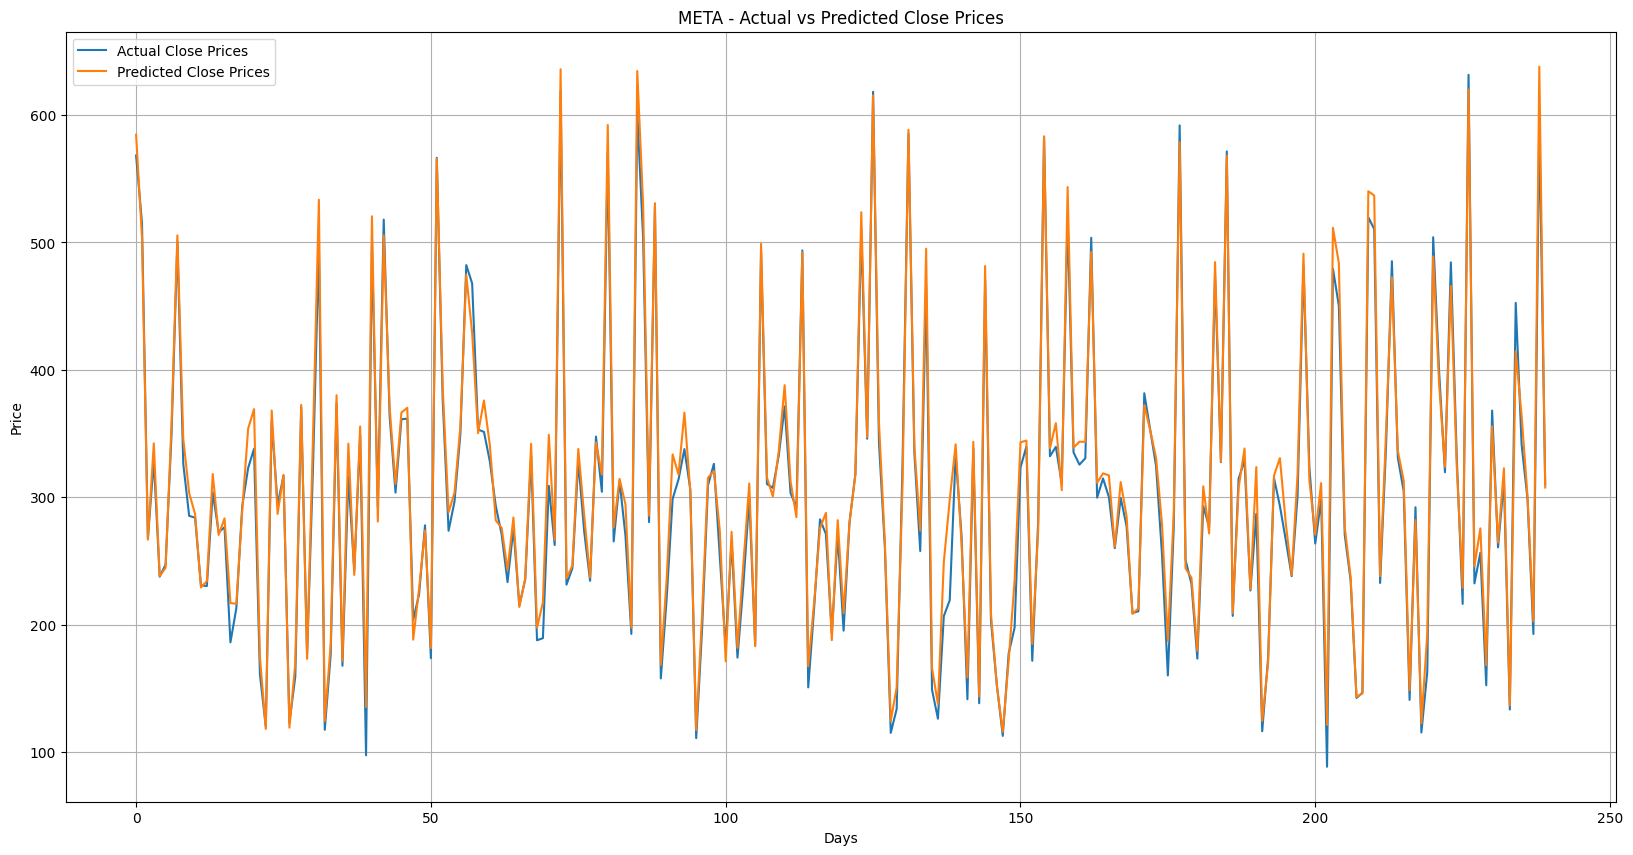

Processing ticker: GOOGL


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 528ms/step - loss: 0.2334 - val_loss: 0.1123
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0765 - val_loss: 0.0076
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0157 - val_loss: 0.0099
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0120 - val_loss: 0.0081
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0106 - val_loss: 0.0053
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0090 - val_loss: 0.0045
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0095 - val_loss: 0.0039
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0078 - val_loss: 0.0033
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0074 - val_loss: 0.0030
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0065 - val_loss: 0.0026
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0060 - val_loss: 0.0025
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0

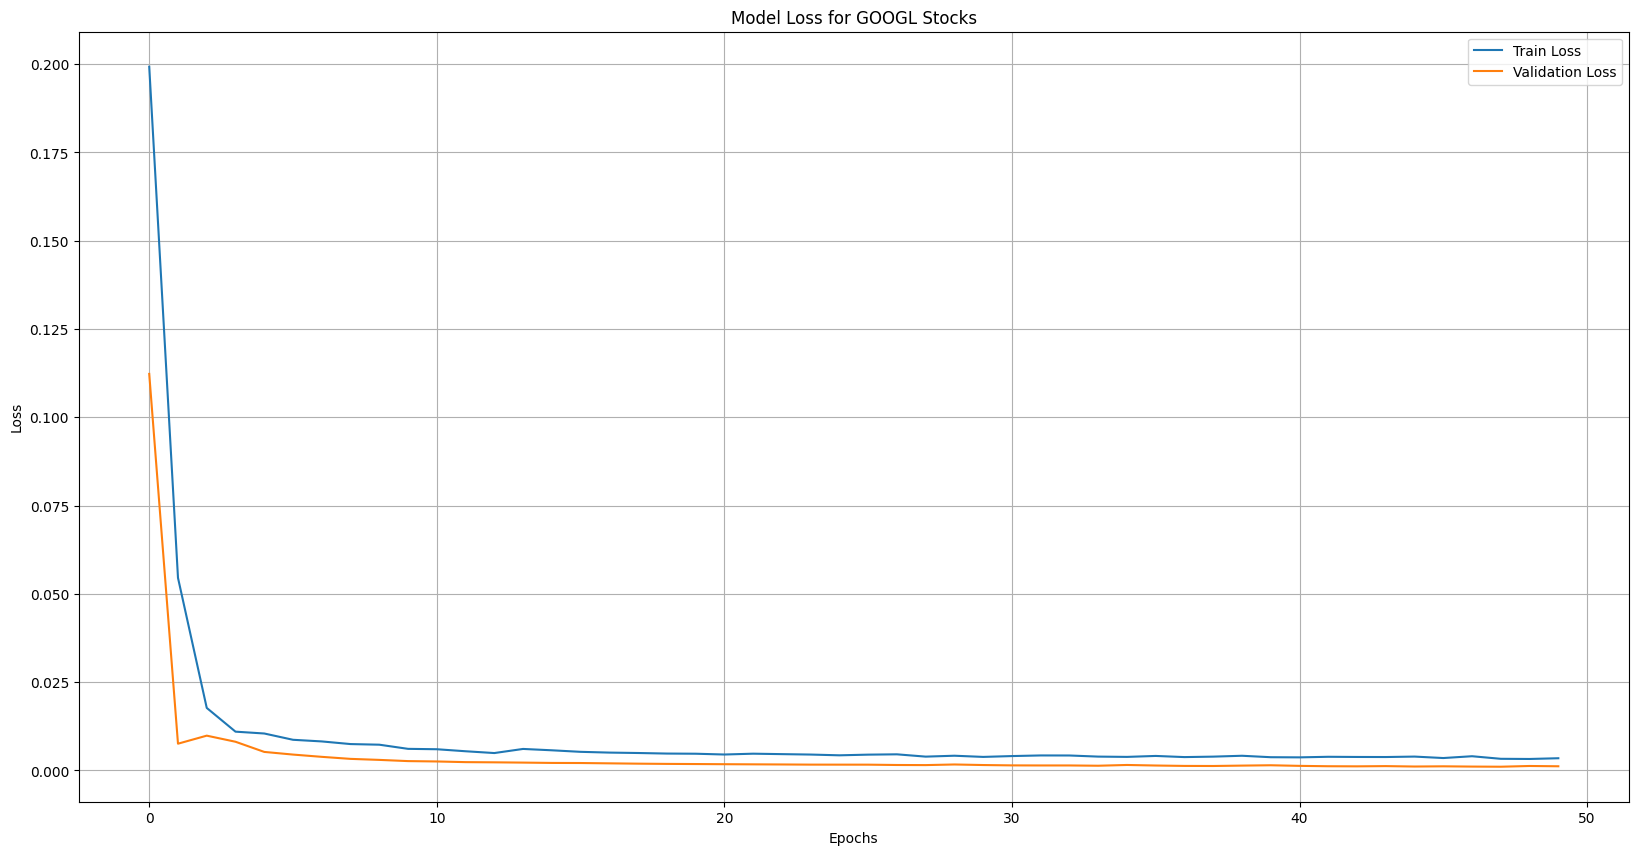

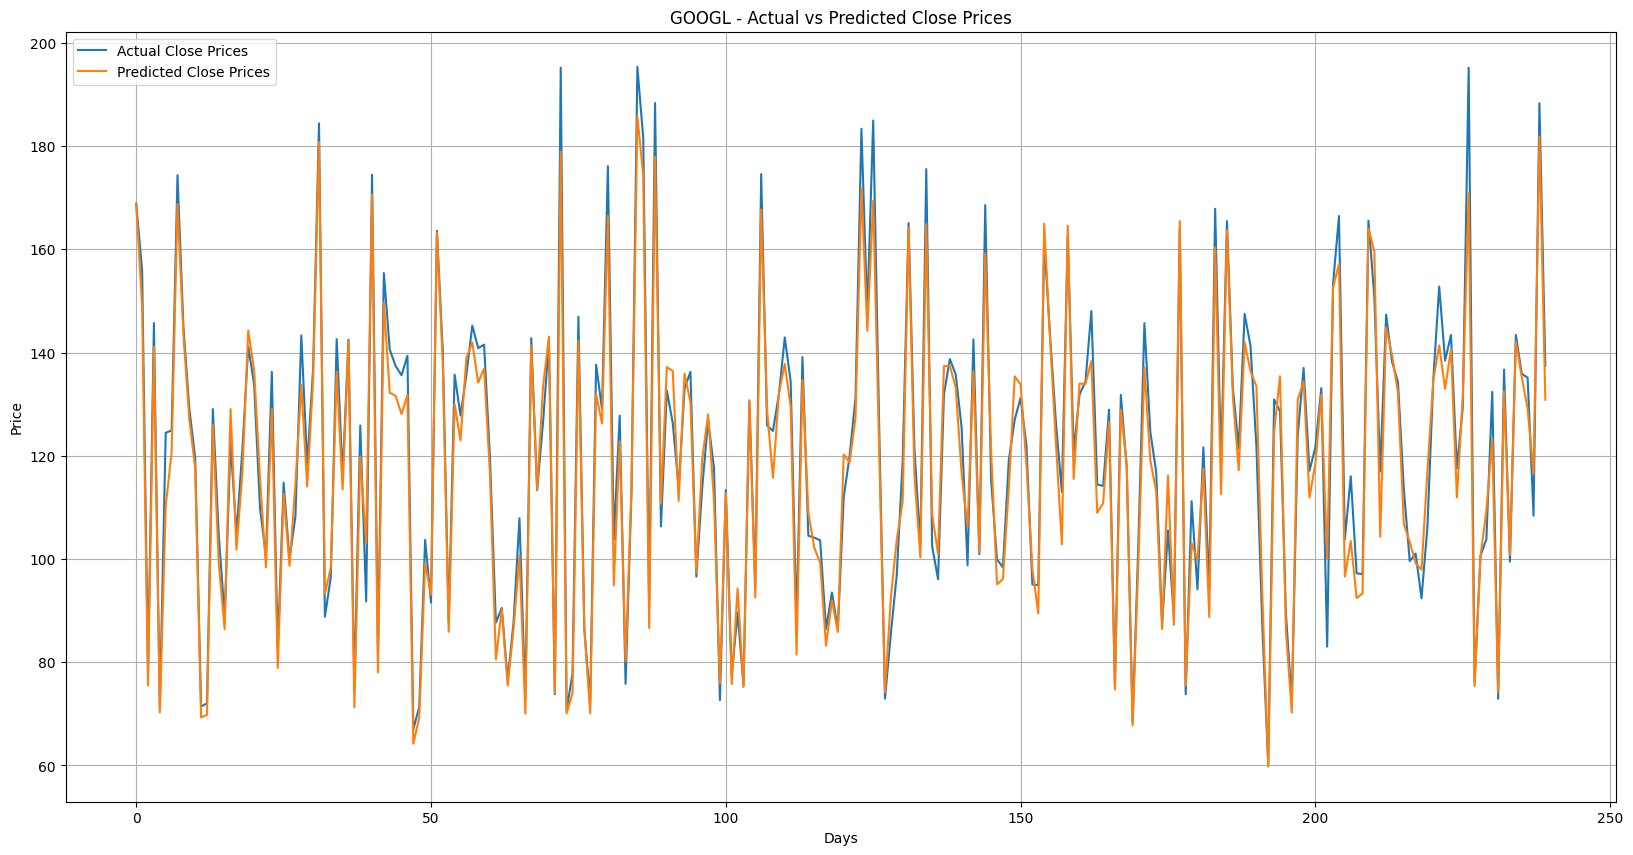

Processing ticker: NVDA


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 524ms/step - loss: 0.1383 - val_loss: 0.0813
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0620 - val_loss: 0.0271
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0201 - val_loss: 0.0141
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0135 - val_loss: 0.0049
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0056 - val_loss: 0.0018
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0045 - val_loss: 0.0015
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0041 - val_loss: 0.0015
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0

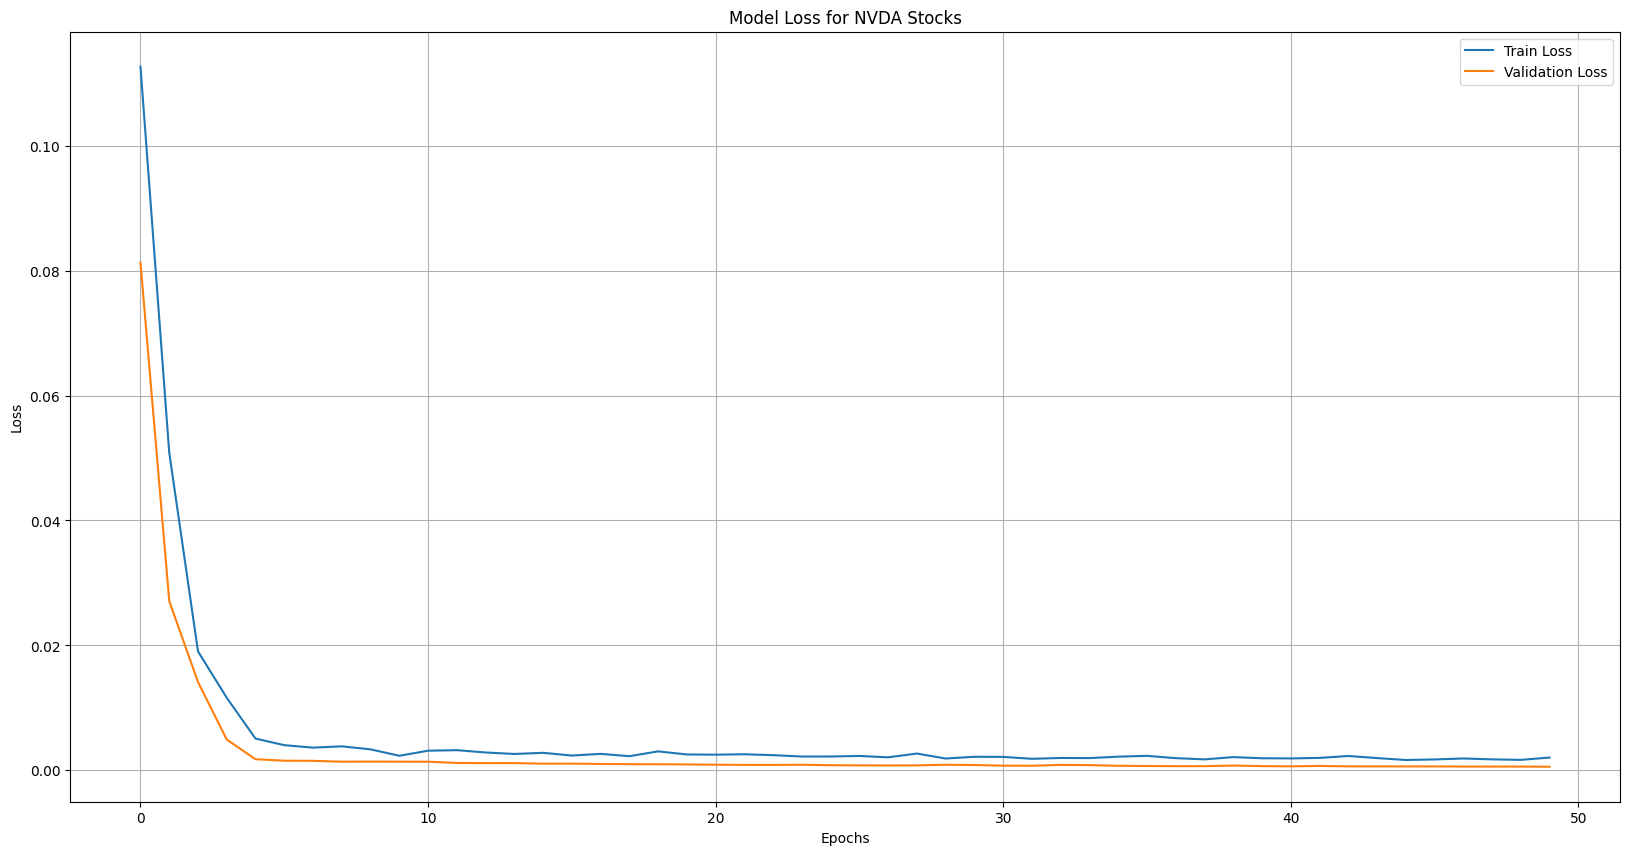

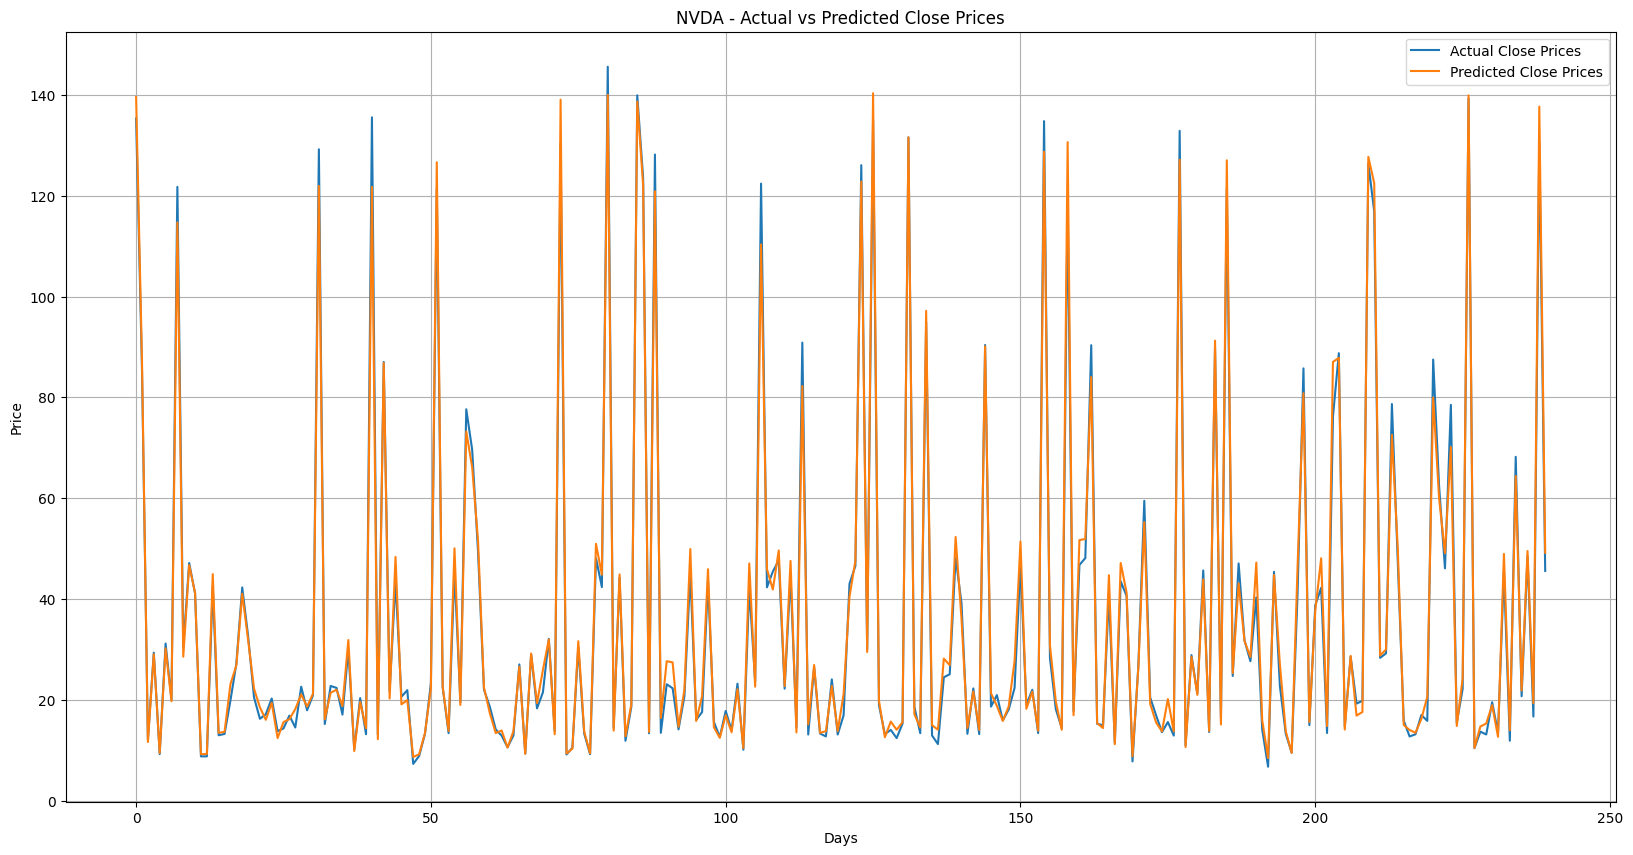

Processing ticker: AVGO


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 525ms/step - loss: 0.0879 - val_loss: 0.0525
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0368 - val_loss: 0.0130
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0130 - val_loss: 0.0101
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0110 - val_loss: 0.0045
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0064 - val_loss: 0.0023
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0035 - val_loss: 7.9328e-04
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0030 - val_loss: 6.1968e-04
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0021 - val_loss: 6.6952e-04
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0020 - val_loss: 6.1965e-04
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0023 - val_loss: 5.8801e-04
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0022 - val_loss: 5.7603e-04
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━

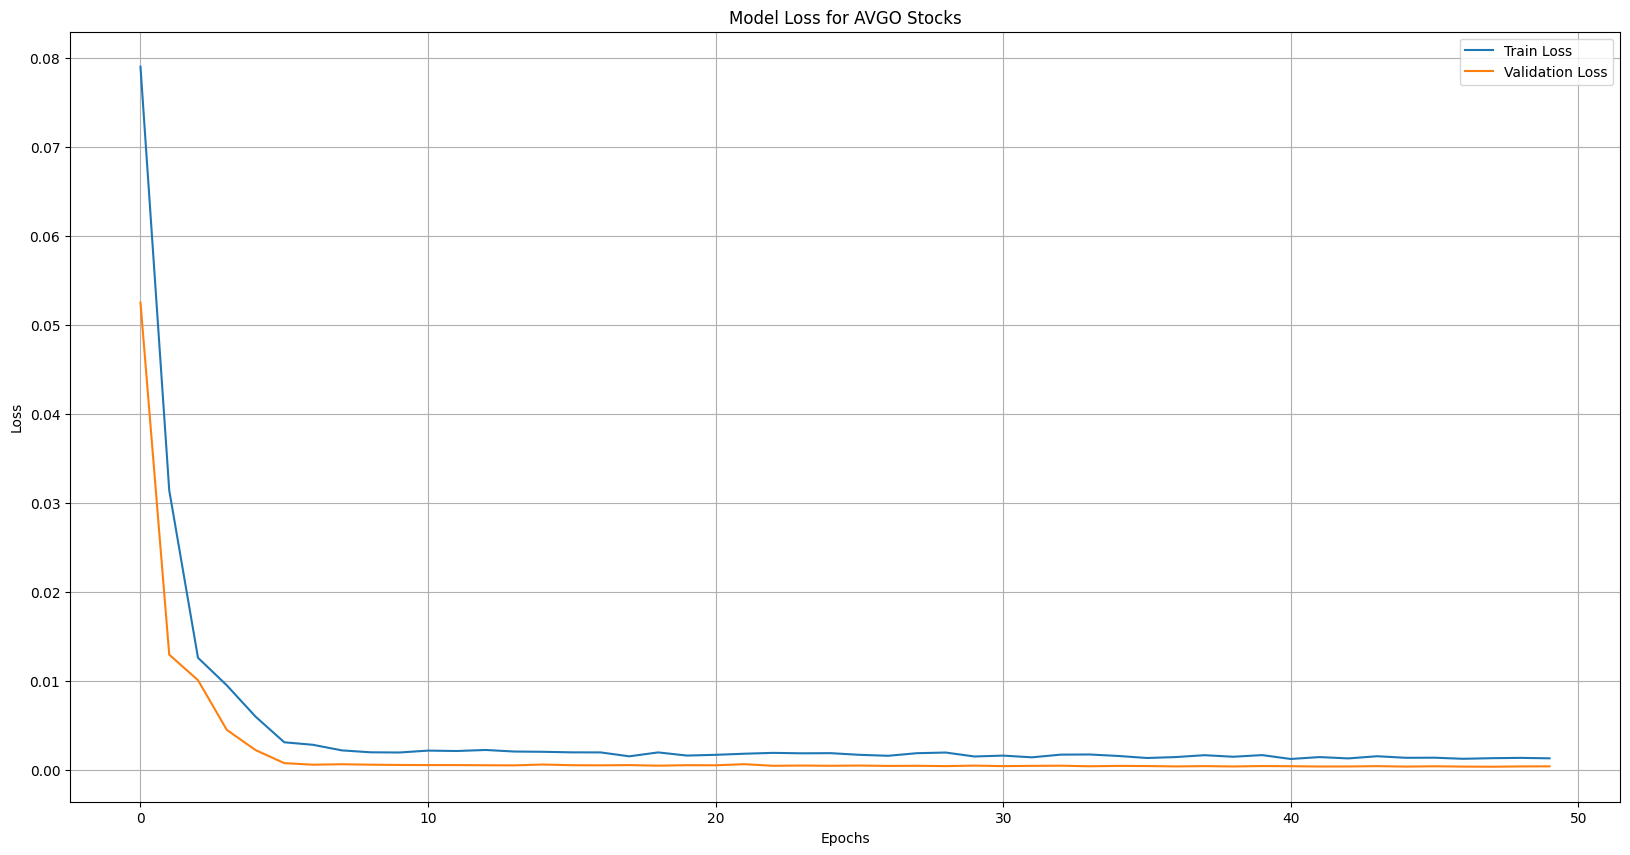

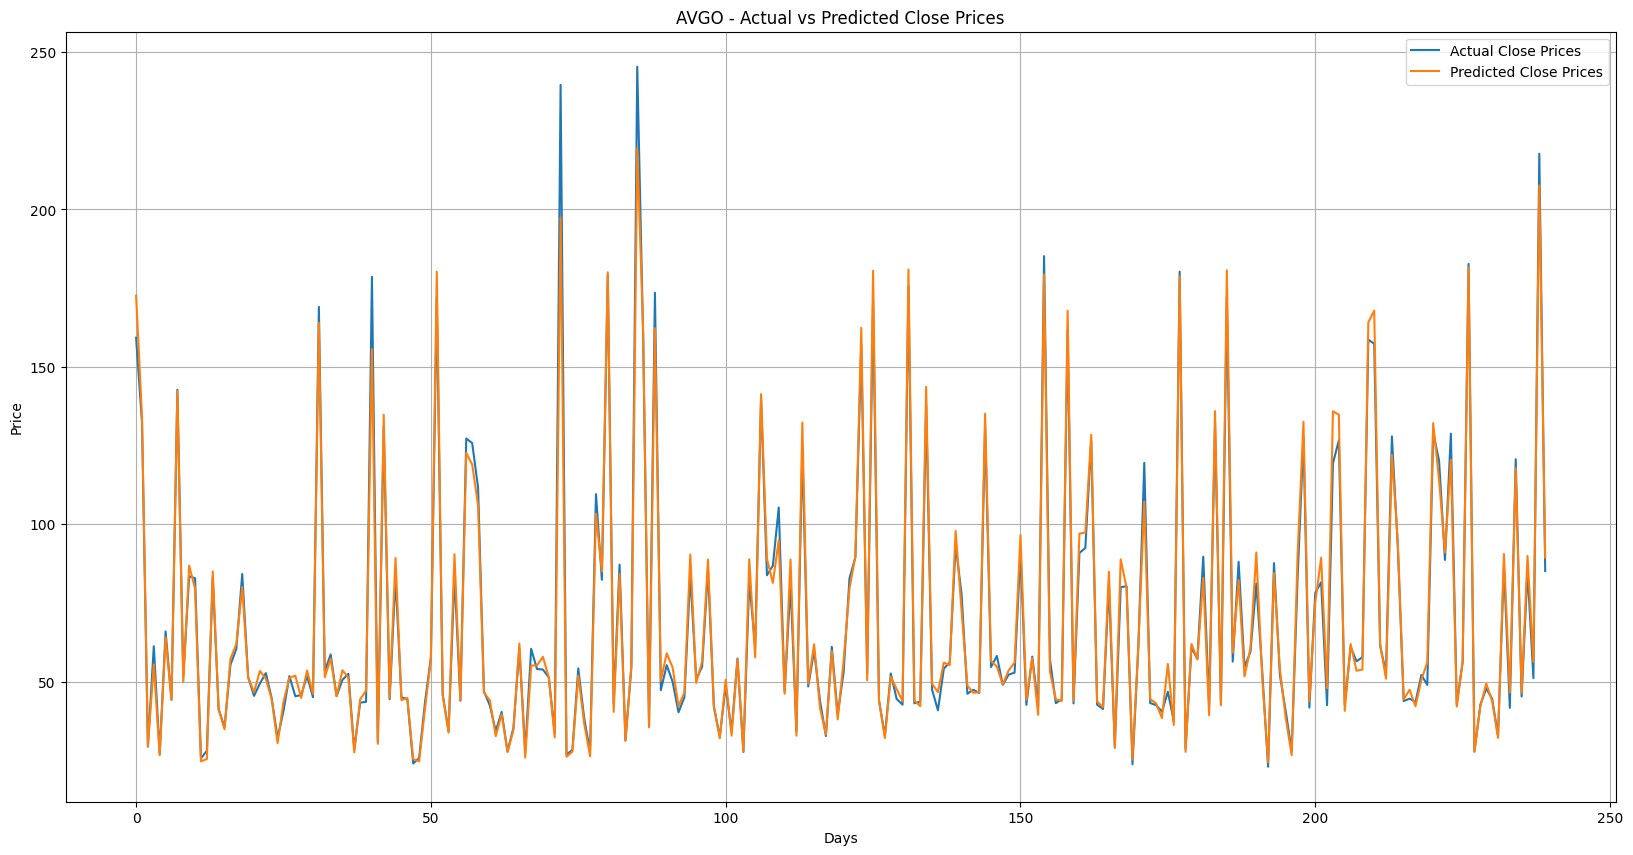

Processing ticker: MSFT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 494ms/step - loss: 0.2588 - val_loss: 0.1292
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0874 - val_loss: 0.0089
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0131 - val_loss: 0.0107
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0120 - val_loss: 0.0051
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0091 - val_loss: 0.0042
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0082 - val_loss: 0.0037
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0079 - val_loss: 0.0031
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0065 - val_loss: 0.0026
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0055 - val_loss: 0.0024
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0054 - val_loss: 0.0022
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.0054 - val_loss: 0.0021
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0

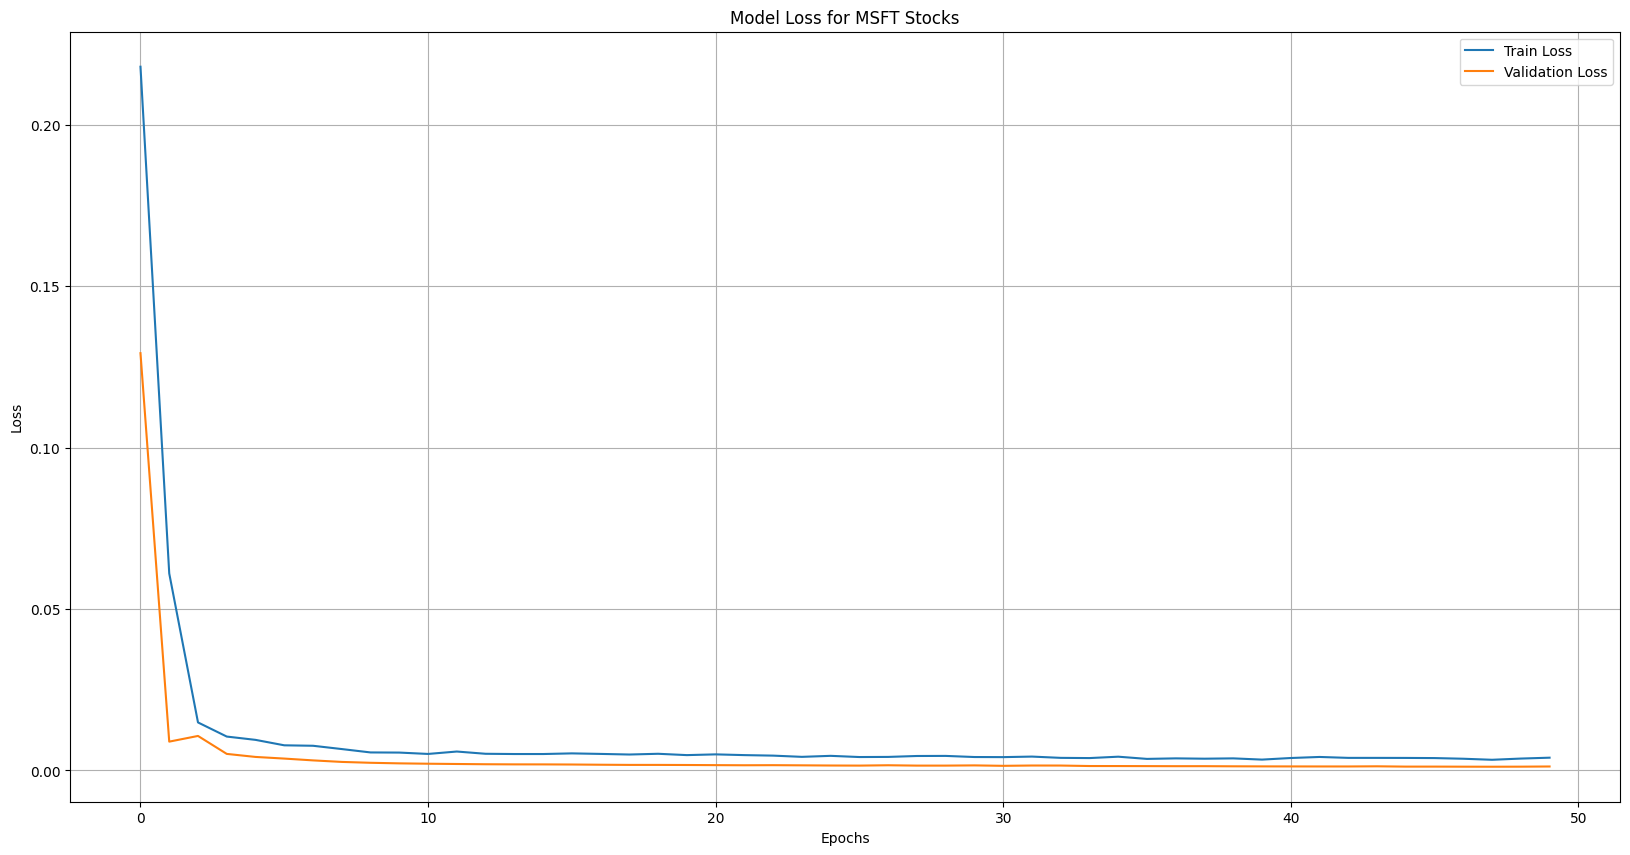

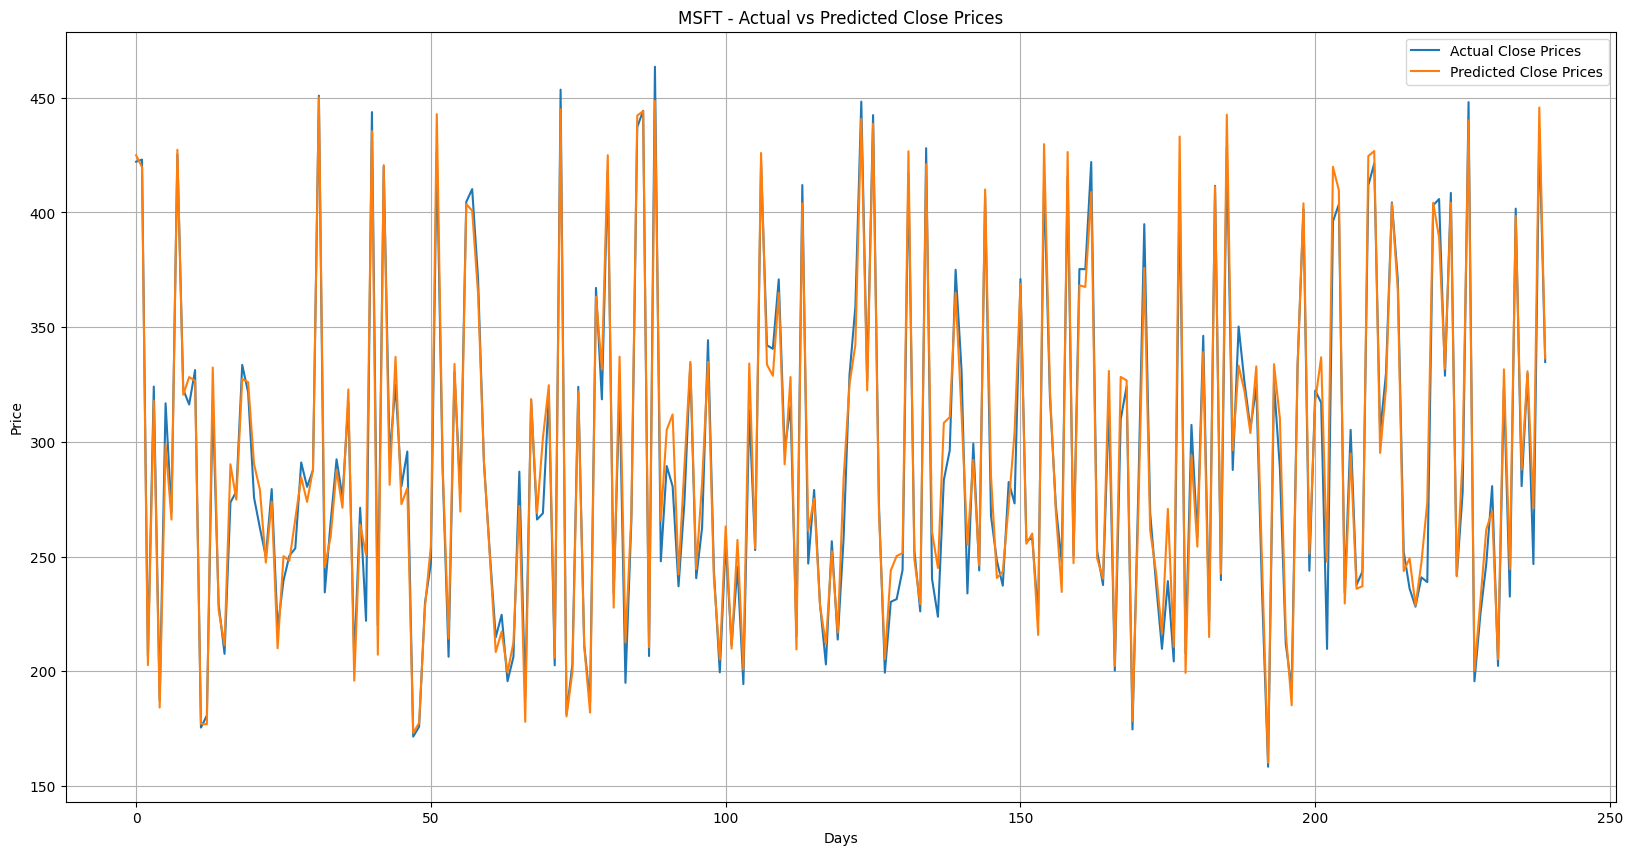

           AAPL        TSLA        META       GOOGL        NVDA        AVGO  \
0    231.493774  337.069550  584.535156  168.672028  139.579605  172.636810   
1    175.008255  176.743210  503.557312  148.984055   87.059647  134.261780   
2    109.528931  112.864151  266.705353   75.500000   11.616798   29.508198   
3    164.438400  311.431610  342.325653  141.137939   29.030451   55.451912   
4     85.865417   66.221878  238.211502   70.273201    9.450052   26.602665   
..          ...         ...         ...         ...         ...         ...   
235  144.268005  254.458084  363.963104  135.248062   21.828388   46.471676   
236  182.785736  244.292496  301.015625  129.088287   49.509708   89.908684   
237  150.858246  248.993347  202.550278  116.478508   19.316393   56.295391   
238  248.122787  427.860840  637.940674  181.869736  137.673325  207.682419   
239  182.510986  259.428619  307.629120  130.872681   49.156410   89.412529   

           MSFT  
0    424.952423  
1    419.782104

In [31]:
def fit_cnn_lstm_individual(df, look_back = 60, epochs= 50, batch_size= 64):
    """
    Fits a CNN-GRU-LSTM model to the adjusted close prices for each ticker separately
    using the specified architecture.

    Parameters:
    - df: DataFrame containing adjusted close prices of multiple tickers.
    - look_back: Number of past time steps to use as input features.
    - epochs: Number of epochs for training.
    - batch_size: Batch size for training.

    Returns:
    - A dictionary with ticker names as keys and their trained models and predictions as values.
    - A DataFrame containing the predictions for each ticker.
    """
    results = {}
    predictions_dict = {}  # Dictionary to store predictions for DataFrame
    scaler = MinMaxScaler(feature_range=(0, 1))
    columns = ["AAPL", "TSLA", "META", "GOOGL", "NVDA","AVGO", "MSFT"]
    for ticker in columns:
        print(f"Processing ticker: {ticker}")
        ticker_data = df[ticker].values.reshape(-1, 1)
        ticker_scaled = scaler.fit_transform(ticker_data)

        # Create dataset for time series modeling
        def create_dataset(data, look_back):
            X, Y = [], []
            for i in range(look_back, len(data)):
                X.append(data[i - look_back:i, 0])  # Look-back period
                Y.append(data[i, 0])  # Target value
            return np.array(X), np.array(Y)

        X, y = create_dataset(ticker_scaled, look_back)

        # Split into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Reshape input for CNN-LSTM
        X_train = X_train.reshape(X_train.shape[0], look_back, 1, 1, 1)
        X_test = X_test.reshape(X_test.shape[0], look_back, 1, 1, 1)

        # CNN-LSTM model with the specified architecture
        cl = Sequential()
        cl.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu'),
                               input_shape=(look_back, 1, 1, 1)))
        cl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cl.add(TimeDistributed(Conv2D(filters=128, kernel_size=(1, 1), activation='relu')))
        cl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cl.add(TimeDistributed(Conv2D(filters=64, kernel_size=(1, 1), activation='relu')))
        cl.add(TimeDistributed(MaxPooling2D(pool_size=(1, 1))))
        cl.add(TimeDistributed(Flatten()))
        cl.add(Bidirectional(GRU(100, return_sequences=True)))
        cl.add(Dropout(0.5))
        cl.add(Bidirectional(LSTM(100, return_sequences=False)))
        cl.add(Dropout(0.5))
        cl.add(Dense(1))

        # Compile the model
        learning_rate = 0.0001
        optimizer = Adam(learning_rate=learning_rate)
        cl.compile(optimizer=optimizer, loss='mean_squared_error')

        # Train the model
        history = cl.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            verbose=1
        )

        # Predictions
        y_pred = cl.predict(X_test)
        y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1))
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Save predictions to dictionary
        predictions_dict[ticker] = y_pred_inv.flatten()

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
        mae = mean_absolute_error(y_test_inv, y_pred_inv)
        r_squared = r2_score(y_test_inv, y_pred_inv)
        final_loss = history.history['loss'][-1]

        print(f"{ticker} - RMSE: {rmse}, MAE: {mae}, R-squared: {r_squared}, Loss: {final_loss}")

        # Save results
        results[ticker] = {
            'model': cl,
            'predictions': y_pred_inv,
            'actuals': y_test_inv,
            'metrics': {
                'RMSE': rmse,
                'MAE': mae,
                'R-squared': r_squared,
                'Loss': final_loss
            },
            'history': history.history
        }
       # Plot training & validation loss
        plt.figure(figsize=(20, 10))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Model Loss for {ticker} Stocks')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot the results (Optional)
        plt.figure(figsize=(20, 10))
        plt.plot(y_test_inv, label='Actual Close Prices')
        plt.plot(y_pred_inv, label='Predicted Close Prices')
        plt.title(f'{ticker} - Actual vs Predicted Close Prices')
        plt.xlabel('Days')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()
    # Convert predictions dictionary to DataFrame
    prediction = pd.DataFrame(predictions_dict)
    return results, prediction


results, prediction = fit_cnn_lstm_individual(stock_df)
# Display the predictions DataFrame
print(prediction)

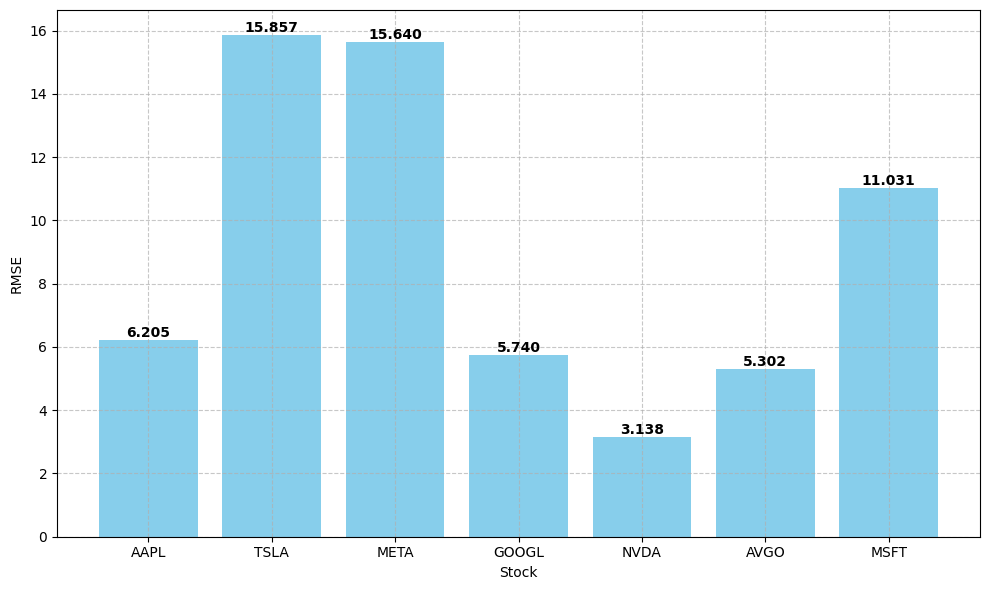

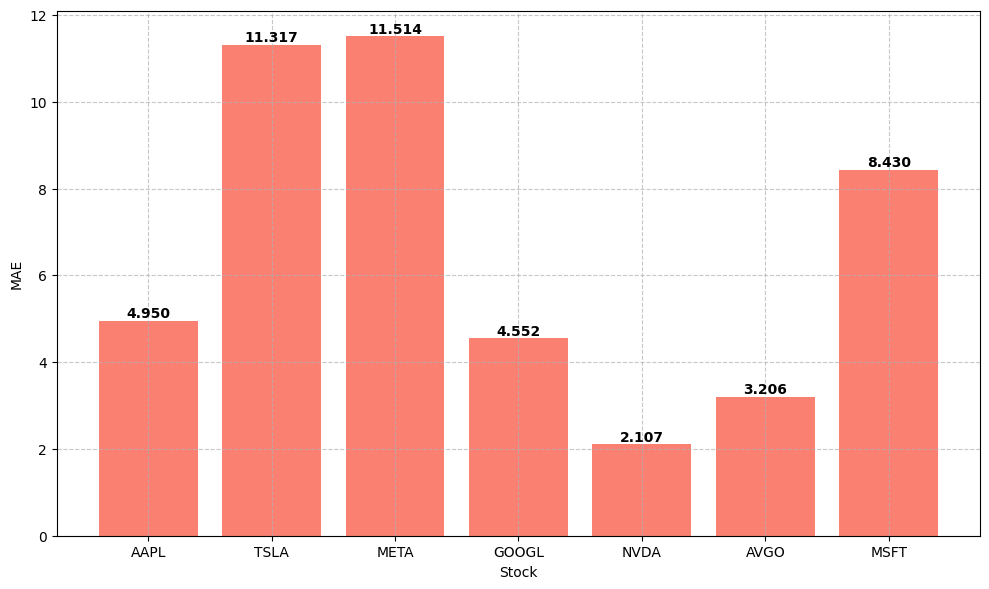

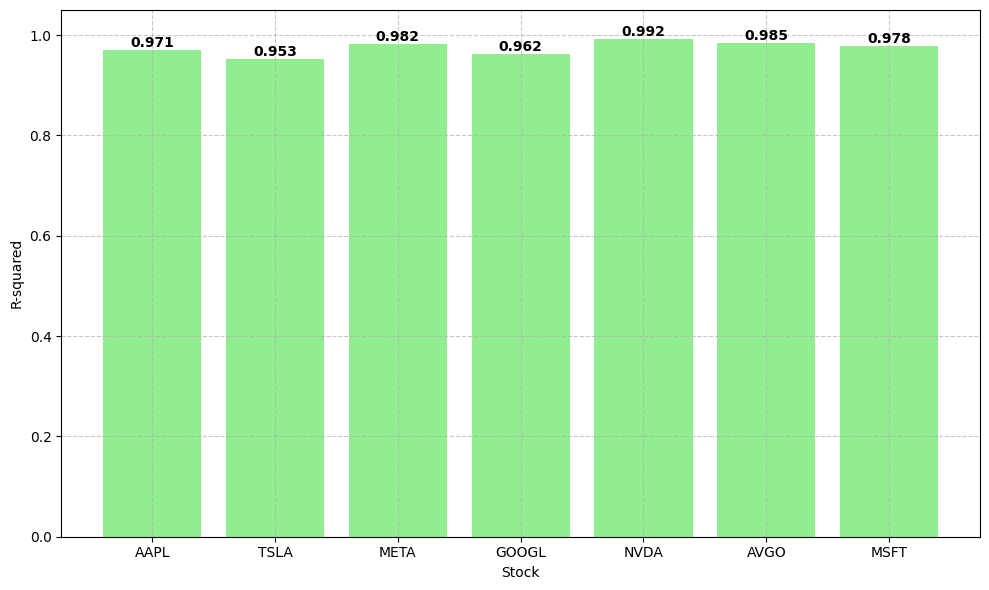

In [32]:
# Extract metrics from the results dictionary
tickers = []
rmses = []
maes = []
r2s = []

for ticker, data in results.items():
    tickers.append(ticker)
    rmses.append(data['metrics']['RMSE'])
    maes.append(data['metrics']['MAE'])
    r2s.append(data['metrics']['R-squared'])

# Function to add value labels on bars
def add_value_labels(ax, values):
    for i, val in enumerate(values):
        ax.text(i, val, f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot RMSE
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, rmses, color='skyblue')
plt.ylabel('RMSE')
plt.xlabel('Stock')
plt.grid(True, linestyle='--', alpha=0.7)
add_value_labels(plt.gca(), rmses)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, maes, color='salmon')
plt.ylabel('MAE')
plt.xlabel('Stock')
plt.grid(True, linestyle='--', alpha=0.7)
add_value_labels(plt.gca(), maes)
plt.tight_layout()
plt.show()

# Plot R-squared
plt.figure(figsize=(10, 6))
bars = plt.bar(tickers, r2s, color='lightgreen')
plt.ylabel('R-squared')
plt.xlabel('Stock')
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
add_value_labels(plt.gca(), r2s)
plt.tight_layout()
plt.show()

In [37]:
def calculate_returns(forecast_results):
    forecast_df = pd.DataFrame(forecast_results)
    log_returns = np.log(forecast_df / forecast_df.shift(1)).dropna()
    return log_returns

def simulate_portfolios(log_returns, n_simulations=100000, risk_free_rate=0.02/252):
    n_assets = log_returns.shape[1]
    results = {
        'Returns': [],
        'Volatility': [],
        'Sharpe': [],
        'Weights': []
    }

    mean_returns = log_returns.mean()
    cov_matrix = log_returns.cov()

    for _ in range(n_simulations):
        weights = np.random.random(n_assets)
        weights /= np.sum(weights)

        port_return = np.dot(weights, mean_returns)
        port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (port_return - risk_free_rate) / port_volatility

        results['Returns'].append(port_return)
        results['Volatility'].append(port_volatility)
        results['Sharpe'].append(sharpe_ratio)
        results['Weights'].append(weights)

    return pd.DataFrame(results), mean_returns, cov_matrix

def get_optimal_portfolios(portfolios_df):
    max_sharpe_idx = portfolios_df['Sharpe'].idxmax()
    min_vol_idx = portfolios_df['Volatility'].idxmin()

    max_sharpe_portfolio = portfolios_df.loc[max_sharpe_idx]
    min_variance_portfolio = portfolios_df.loc[min_vol_idx]

    return max_sharpe_portfolio, min_variance_portfolio

def plot_efficient_frontier(portfolios_df, max_sharpe_portfolio, min_variance_portfolio):
    plt.figure(figsize=(12, 7))
    plt.scatter(portfolios_df['Volatility'], portfolios_df['Returns'], c=portfolios_df['Sharpe'], cmap='viridis', marker='o', alpha=0.4)
    plt.colorbar(label='Sharpe Ratio')
    plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Returns'], marker='*', color='r', s=300, label='Max Sharpe Ratio')
    plt.scatter(min_variance_portfolio['Volatility'], min_variance_portfolio['Returns'], marker='X', color='b', s=200, label='Min Variance')
    plt.title('Efficient Frontier')
    plt.xlabel('Volatility (Std. Dev.)')
    plt.ylabel('Expected Return')
    plt.legend()
    plt.grid(True)
    plt.show()


Maximum Sharpe Ratio Portfolio Weights:
AAPL: 33.71%
TSLA: 40.60%
META: 0.93%
GOOGL: 14.20%
NVDA: 0.54%
AVGO: 0.32%
MSFT: 9.70%

Minimum Variance Portfolio Weights:
AAPL: 45.87%
TSLA: 3.12%
META: 4.97%
GOOGL: 26.66%
NVDA: 0.04%
AVGO: 1.67%
MSFT: 17.66%


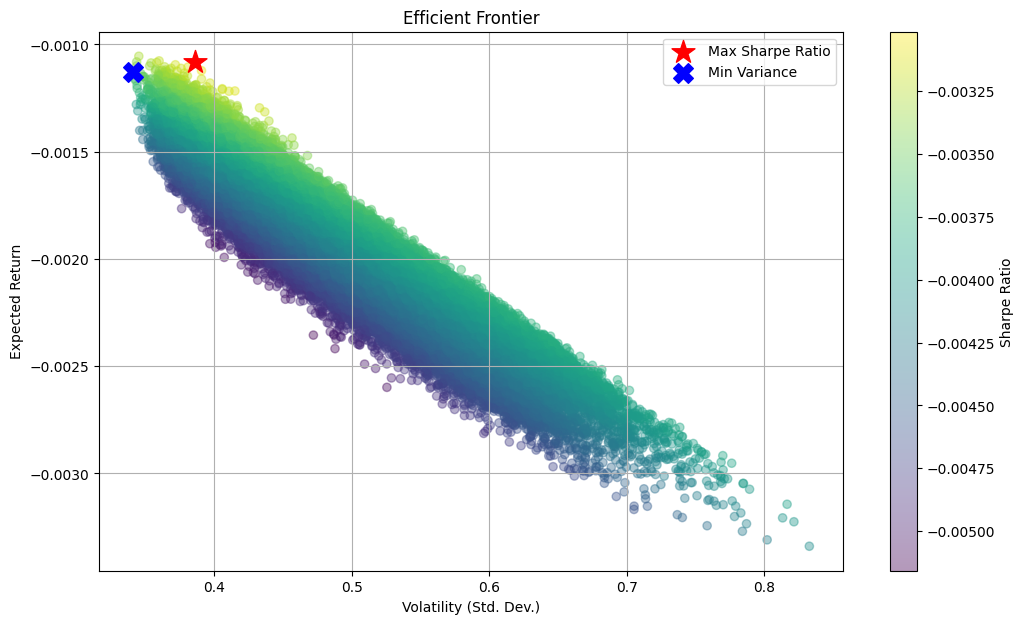

In [38]:
log_returns = calculate_returns(prediction)
portfolios_df, mean_returns, cov_matrix = simulate_portfolios(log_returns)
max_sharpe_portfolio, min_variance_portfolio = get_optimal_portfolios(portfolios_df)

# Show weights nicely
tickers = list(log_returns.columns)
print("\nMaximum Sharpe Ratio Portfolio Weights:")
for t, w in zip(tickers, max_sharpe_portfolio['Weights']):
    print(f"{t}: {w:.2%}")

print("\nMinimum Variance Portfolio Weights:")
for t, w in zip(tickers, min_variance_portfolio['Weights']):
    print(f"{t}: {w:.2%}")

# Plot Efficient Frontier
plot_efficient_frontier(portfolios_df, max_sharpe_portfolio, min_variance_portfolio)

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


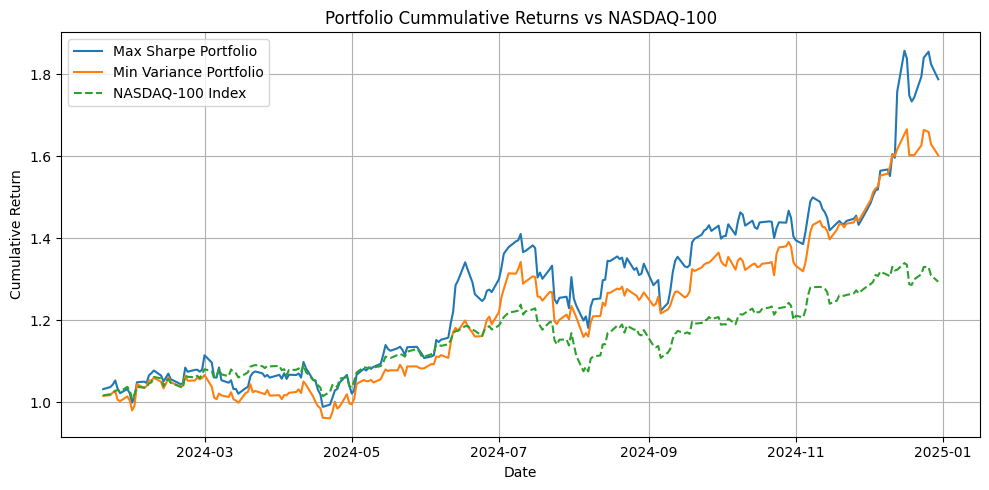

In [39]:
start_date = "2024-01-18"
end_date = "2024-12-31"
tickers = list(log_returns.columns)

actual_prices = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
nasdaq100 = yf.download("^IXIC", start=start_date, end=end_date, auto_adjust=False)['Adj Close']

# Step 2: Compute daily returns
actual_returns = actual_prices.pct_change().dropna()
nasdaq_returns = nasdaq100.pct_change().dropna()

# Step 3: Calculate Portfolio Returns
def compute_portfolio_returns(weights, daily_returns):
    return (daily_returns @ weights)

max_sharpe_returns = compute_portfolio_returns(np.array(max_sharpe_portfolio['Weights']), actual_returns)
min_var_returns = compute_portfolio_returns(np.array(min_variance_portfolio['Weights']), actual_returns)

# Step 4: Compute cumulative returns
max_sharpe_cum = (1 + max_sharpe_returns).cumprod()
min_var_cum = (1 + min_var_returns).cumprod()
nasdaq_cum = (1 + nasdaq_returns).cumprod()

# Step 5: Plotting the comparison
plt.figure(figsize=(10, 5))
plt.plot(max_sharpe_cum, label="Max Sharpe Portfolio")
plt.plot(min_var_cum, label="Min Variance Portfolio")
plt.plot(nasdaq_cum, label="NASDAQ-100 Index", linestyle='--')
plt.title("Portfolio Cummulative Returns vs NASDAQ-100")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
print(f"Max Sharpe Portfolio: {(float(max_sharpe_cum.iloc[-1]) - 1)*100:.2f}%")
print(f"Min Variance Portfolio: {(float(min_var_cum.iloc[-1]) - 1)*100:.2f}%")
print(f"NASDAQ-100 Index: {(float(nasdaq_cum.iloc[-1]) - 1)*100:.2f}%")

Max Sharpe Portfolio: 78.81%
Min Variance Portfolio: 60.25%
NASDAQ-100 Index: 29.43%


<ipython-input-40-451ab6d8cd7a>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"NASDAQ-100 Index: {(float(nasdaq_cum.iloc[-1]) - 1)*100:.2f}%")
